<a href="https://colab.research.google.com/github/ishandahal/ml_model_evaluation/blob/main/Cross_validation_Model_selection_KFold_STD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install watermark

In [5]:
%load_ext watermark
%watermark -a 'ishan dahal' -u -d -v -p numpy,mlxtend,matplotlib,sklearn

ishan dahal 
last updated: 2020-11-24 

CPython 3.6.9
IPython 5.5.0

numpy 1.18.5
mlxtend 0.14.0
matplotlib 3.2.2
sklearn 0.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

### K-fold and standard deviation (1-standard error method)
- Below is an application of the 1-standard error method (selecting hyperparameters according to the "Law of Parsimony")

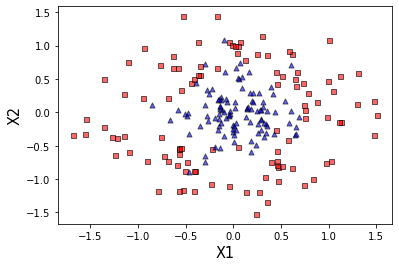

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, random_state=1, noise=0.275, factor=0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=12345,
                                                    stratify=y)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1],
            marker='s', color='red', edgecolor='k', alpha=0.6, s=25)
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],
            marker='^', color='blue', edgecolor='k', alpha=0.6, s=25)
plt.xlabel('X1', fontsize=14.5)
plt.ylabel('X2', fontsize=14.5)

plt.show()

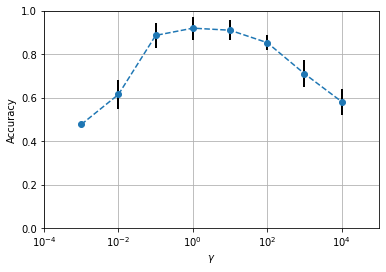

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

params = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
cv_acc, cv_std, cv_stderr = [], [], []

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for c in params:

    clf = SVC(C=10.0,
              kernel='rbf',
              degree=1,
              gamma=c,
              coef0=0.0,
              shrinking=True,
              probability=False,
              tol=0.001,
              cache_size=200,
              class_weight=None,
              verbose=False,
              max_iter=-1,
              decision_function_shape='ovo',
              random_state=0)
    
    all_acc = []
    for train_index, valid_index in cv.split(X_train, y_train):
        pred = clf.fit(X_train[train_index], y_train[train_index])\
               .predict(X_train[valid_index])
        acc = np.mean(y_train[valid_index] == pred)
        all_acc.append(acc)
    
    all_acc = np.array(all_acc)
    y_pred_cv10_mean = all_acc.mean()
    y_pred_cv10_std = all_acc.std()
    y_pred_cv10_stderr = y_pred_cv10_std / np.sqrt(10)

    cv_acc.append(y_pred_cv10_mean)
    cv_std.append(y_pred_cv10_std)
    cv_stderr.append(y_pred_cv10_stderr)

ax = plt.subplot(111)
ax.set_xscale('log')
ax.errorbar(params, cv_acc, yerr=cv_std, fmt='--o', ecolor='black', elinewidth=2)

plt.ylim([0.0, 1.0])
plt.xlim([0.0001, 100000.0])
plt.grid()
plt.xlabel("$\\gamma$")
plt.ylabel("Accuracy")
plt.show()

- Visualizing the decision boundry of the "most parsimonious" hyperparameter
- The simplest may not always be the best for the problem at hand

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

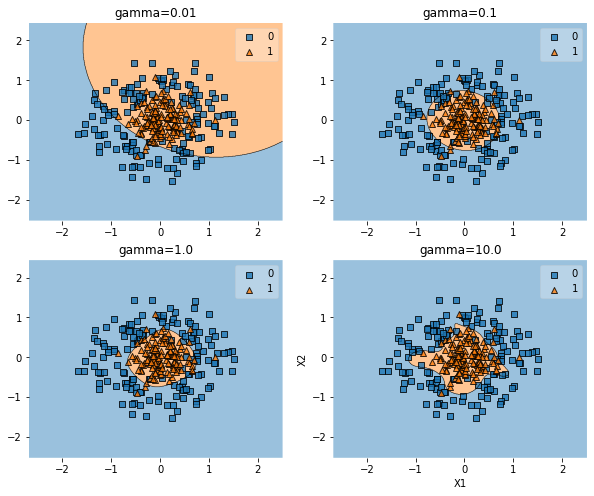

In [29]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gspec = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for c, grd in zip([0.01, 0.1, 1.0, 10.], itertools.product([0, 1], repeat=2)):

    clf = SVC(C=10.0,
              kernel='rbf',
              degree=1,
              gamma=c,
              coef0=0.0,
              shrinking=True,
              probability=False,
              tol=0.001,
              cache_size=200,
              class_weight=None,
              verbose=False,
              max_iter=-1,
              decision_function_shape='ovo',
              random_state=0)
    
    clf.fit(X_train, y_train)
    ax = plt.subplot(gspec[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(f"gamma={c}")

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

- Choosing the most parsimonious hyperparameter using decision trees and two features of the Iris dataset (petal length and petal width)

In [30]:
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split

X, y = iris_data()
X = X[:, [2, 3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15,
                                                    shuffle=True, stratify=y)

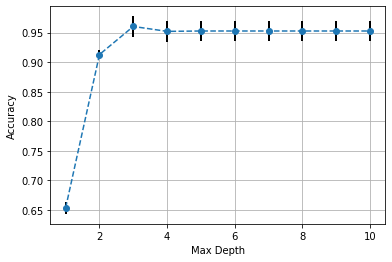

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

params = range(1, 11)
cv_acc, cv_std, cv_stderr = [], [], []

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for c in params:

    clf = DecisionTreeClassifier(random_state=123, max_depth=c)

    all_acc = []
    for train_index, valid_index in cv.split(X_train, y_train):
        pred = clf.fit(X_train[train_index], y_train[train_index])\
                .predict(X_train[valid_index])
        acc = np.mean(y_train[valid_index] == pred)
        all_acc.append(acc)
    
    all_acc = np.array(all_acc)
    y_pred_cv10_mean = all_acc.mean()
    y_pred_cv10_std = all_acc.std()
    y_pred_cv10_stderr = y_pred_cv10_std / np.sqrt(10)

    cv_acc.append(y_pred_cv10_mean)
    cv_std.append(y_pred_cv10_std)
    cv_stderr.append(y_pred_cv10_stderr)

ax = plt.subplot(111)
ax.errorbar(params, cv_acc, yerr=cv_stderr, fmt='--o', ecolor='black', elinewidth=2)
plt.grid()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

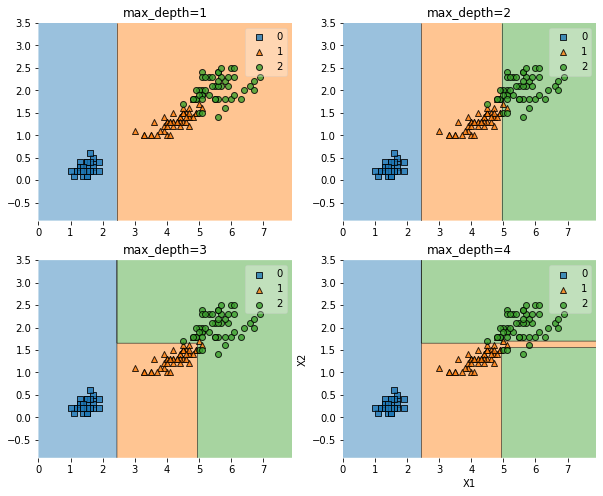

In [45]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gspec = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for c, grd in zip([1, 2, 3, 4], itertools.product([0, 1], repeat=2)):

    clf = DecisionTreeClassifier(random_state=123, max_depth=c)
    clf.fit(X_train, y_train)
    ax = plt.subplot(gspec[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(f"max_depth={c}")

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()